In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('loan_data.csv')

In [6]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [8]:
# Encode categorical features
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

In [12]:
# Features and target selection
features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
            'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'] + categorical_columns
target = 'loan_status'

X = data[features]
y = data[target]

In [16]:
# Normalize numerical features using iloc
scaler = StandardScaler()
X.iloc[:, :8] = scaler.fit_transform(X.iloc[:, :8])

In [18]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Predictions and Metrics
y_pred = model.predict(X_test)

In [24]:
# Classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [26]:
# Calculate log loss for training and validation
train_log_loss = log_loss(y_train, model.predict_proba(X_train))
test_log_loss = log_loss(y_test, model.predict_proba(X_test))

In [28]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Training Log Loss: {train_log_loss}")
print(f"Validation Log Loss: {test_log_loss}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.89
Precision: 0.7667364016736402
Recall: 0.7293532338308458
F1 Score: 0.747577766445691
Training Log Loss: 0.23071454733147362
Validation Log Loss: 0.23484117930060672

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



In [59]:
# Decision Boundary

# Use two features for decision boundary visualization
feature1 = 'person_income'
feature2 = 'loan_amnt'

In [61]:
# Select only two features for this specific plot
X_plot = X[[feature1, feature2]]
model_plot = LogisticRegression(max_iter=1000)
model_plot.fit(X_plot, y)

LogisticRegression(max_iter=1000)

In [63]:
# Create a mesh grid
x_min, x_max = X_plot[feature1].min() - 1, X_plot[feature1].max() + 1
y_min, y_max = X_plot[feature2].min() - 1, X_plot[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [65]:
# Predict for each point in the mesh using a DataFrame 
mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature1, feature2])
Z = model_plot.predict(mesh_data)
Z = Z.reshape(xx.shape)

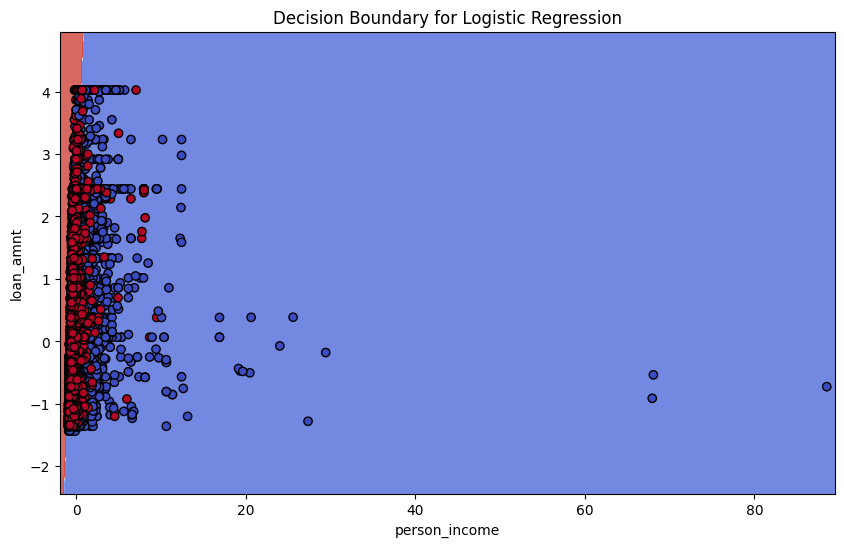

In [67]:
# Plot decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_plot[feature1], X_plot[feature2], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary for Logistic Regression')
plt.show()

In [30]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies, precisions, recalls, f1_scores, log_losses = [], [], [], [], []

for train_index, val_index in kf.split(X):
    X_train_k, X_val_k = X.iloc[train_index], X.iloc[val_index]
    y_train_k, y_val_k = y.iloc[train_index], y.iloc[val_index]
    
    model.fit(X_train_k, y_train_k)
    y_val_pred = model.predict(X_val_k)
    
    accuracies.append(accuracy_score(y_val_k, y_val_pred))
    precisions.append(precision_score(y_val_k, y_val_pred))
    recalls.append(recall_score(y_val_k, y_val_pred))
    f1_scores.append(f1_score(y_val_k, y_val_pred))
    log_losses.append(log_loss(y_val_k, model.predict_proba(X_val_k)))

In [32]:
print("\nK-Fold Cross-Validation Metrics:")
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")
print(f"Mean Log Loss: {np.mean(log_losses)}")


K-Fold Cross-Validation Metrics:
Mean Accuracy: 0.8910222222222222
Mean Precision: 0.7651332173031365
Mean Recall: 0.7353719301252898
Mean F1 Score: 0.7499266429018602
Mean Log Loss: 0.23174244516358752
